In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- SPC retention parameters (Eq. 11; Schmidt et al., 2025)
a1_spc, k1 = 0.1787, 0.5337
a2_spc, k2 = 0.8237, 0.00997


In [2]:
def f_SPC(t):
    """
    SPC retention curve:
    f_SPC(t) = a1 exp(-k1 t) + a2 exp(-k2 t)
    Works for scalar or vector t.
    """
    t = np.asarray(t, dtype=float)
    return a1_spc*np.exp(-k1*t) + a2_spc*np.exp(-k2*t)

def trapz(yvals, xvals):
    """Robust trapezoidal integration (works across numpy versions)."""
    yvals = np.asarray(yvals, dtype=float)
    xvals = np.asarray(xvals, dtype=float)
    return np.sum((yvals[1:] + yvals[:-1]) * 0.5 * (xvals[1:] - xvals[:-1]))

def SPC_int_numeric(H, n=20_000):
    """Numeric integral: ∫_0^H f_SPC(t) dt"""
    t = np.linspace(0.0, float(H), n+1)
    return trapz(f_SPC(t), t)

def SPC_int_analytic(H):
    """Analytic integral: ∫_0^H f_SPC(t) dt"""
    H = float(H)
    return (
        a1_spc*(1.0 - np.exp(-k1*H))/k1 +
        a2_spc*(1.0 - np.exp(-k2*H))/k2
    )


SPC_int_analytic(H=20) = 15.270303408001 yr - this is the value to use for TCE(H)
SPC_int_numeric (H=20) = 15.270303416073 yr  this is a sanity check using 20000 trapezoids.
abs diff = 8.071e-09 yr


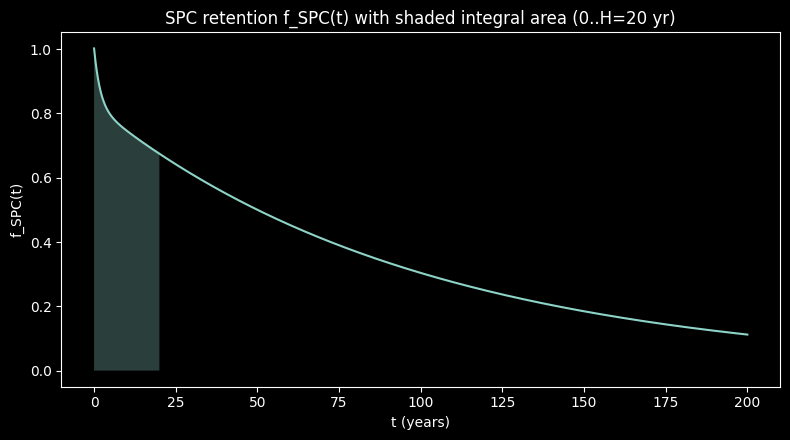

In [3]:
# --- User choices (edit here)
H = 20
n = 20_000

val_a = SPC_int_analytic(H)
val_n = SPC_int_numeric(H, n=n)

print(f"SPC_int_analytic(H={H}) = {val_a:.12f} yr - this is the value to use for TCE(H)")
print(f"SPC_int_numeric (H={H}) = {val_n:.12f} yr  this is a sanity check using {n} trapezoids.")
print(f"abs diff = {abs(val_n - val_a):.3e} yr")


# --- Plot choices
tmax = 200
dt = 0.1

t = np.arange(0.0, tmax + dt, dt)
yvals = f_SPC(t)

mask = (t <= H)

plt.figure(figsize=(8, 4.5))
plt.plot(t, yvals)
plt.fill_between(t[mask], 0, yvals[mask], alpha=0.3)
plt.xlabel("t (years)")
plt.ylabel("f_SPC(t)")
plt.title(f"SPC retention f_SPC(t) with shaded integral area (0..H={H} yr)")
plt.tight_layout()
plt.show()
